<a href="https://colab.research.google.com/github/PrashantShrivastava1612/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - NYC Taxi Trip Time Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [144]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
from datetime import date

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
# Load Dataset
path = "/content/drive/MyDrive/Almabetter/Capstone Project/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv"
dataset = pd.read_csv(path)

### Dataset First View

In [147]:
# Dataset First Look
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435


### Dataset Rows & Columns count

In [148]:
# Dataset Rows & Columns count
dataset.shape

(1458644, 11)

We have 11 variables(columns) and 1458644 observtions(rows) in our dataset.

### Dataset Information

In [149]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [150]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

We have 0 duplicate rows in our dataset.

#### Missing Values/Null Values

In [151]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We have no null values in any column of our dataset.

### What did you know about your dataset?

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). We have to analyse duration of  trips and the insights behind it.


The above dataset has 1458644 rows and 11 columns. There are no mising values and duplicate values in the dataset. 

## ***2. Understanding Your Variables***

In [152]:
# Dataset Columns
dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [153]:
# Dataset Describe
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


### Variables Description 

**INDEPENDENT VARIABLES**

**id** - a unique identifier for each trip

**vendor_id** - a code indicating the provider associated with the trip record

**pickup_datetime** - date and time when the meter was engaged

**dropoff_datetime** - date and time when the meter was disengaged

**passenger_count** - the number of passengers in the vehicle (driver entered value)

**pickup_longitude** - the longitude where the meter was engaged

**pickup_latitude** - the latitude where the meter was engaged

**dropoff_longitude** - the longitude where the meter was disengaged

**dropoff_latitude** - the latitude where the meter was disengaged

**store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

**TARGET VARIABLE**

**trip_duration** - duration of the trip in seconds

### Check Unique Values for each variable.

In [154]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [155]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df=dataset.copy()

In [156]:
zero_df=df[df['trip_duration']==0]
zero_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [157]:
#how many trips are there for each passenger_count
pc_df = pd.DataFrame(df.groupby(by='passenger_count').id.count()).rename(columns = {'id':'no of rows'})
pc_df

,no of rows
passenger_count,
0,60
1,1033540
2,210318
3,59896
4,28404
5,78088
6,48333
7,3
8,1


In [158]:
#what is the share of each vendor in dateset
vendor_df=pd.DataFrame(df.groupby('vendor_id').id.count())
vendor_df.insert(1,'Percentage',[i*100/vendor_df.id.sum() for i in vendor_df['id']])
vendor_df

,id,Percentage
vendor_id,,
1,678342,46.50
2,780302,53.50


In [159]:
#what is the distribution for store_and_fwd_flag variable
flag_var_df=pd.DataFrame(df.groupby('store_and_fwd_flag').id.count())
flag_var_df.insert(1,'Percentage',[i*100/flag_var_df.id.sum() for i in flag_var_df['id']])
flag_var_df

,id,Percentage
store_and_fwd_flag,,
N,1450599,99.45
Y,8045,0.55


In [160]:
#converting strings to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


In [161]:
#exploring the range of timestamps given in data
print('pickup_datetime ranges from ', min(df['pickup_datetime']), 'to', max(df['pickup_datetime']))
print('dropoff_datetime ranges from ', min(df['dropoff_datetime']), 'to', max(df['dropoff_datetime']))

pickup_datetime ranges from  2016-01-01 00:00:17 to 2016-06-30 23:59:39
dropoff_datetime ranges from  2016-01-01 00:03:31 to 2016-07-01 23:02:03


In [162]:
type(df['pickup_datetime'][10])

pandas._libs.tslibs.timestamps.Timestamp

In [163]:
#adding features related to datetime to gain more insights from data
df['day_of_week'] = df.pickup_datetime.dt.weekday
df['month'] = df.pickup_datetime.dt.month
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [164]:
#adding column with name of weekday
dict_of_days={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
list_of_days = []
for i in df['day_of_week']:
  list_of_days.append(dict_of_days[i])
df['weekday_name']=list_of_days

In [165]:
#adding a column with trip distance
import geopy.distance

dist_list=[]

for i in df['id'].index:
  pickup_lat= df['pickup_latitude'][i]
  pickup_long= df['pickup_longitude'][i]
  dropoff_lat= df['dropoff_latitude'][i]
  dropoff_long= df['dropoff_longitude'][i]

  coords_1 = (pickup_lat, pickup_long)
  coords_2 = (dropoff_lat, dropoff_long)


  dist_list.append(geopy.distance.geodesic(coords_1, coords_2).km)

df['distance'] = dist_list

In [166]:
df.shape

(1458644, 16)

In [167]:
df['distance'] = df['distance'].astype(float)
df.rename(columns={'distance':'distance_in_km'},inplace=True)

In [168]:
#calculating avg speed of trip
df['avg_speed_kmph']=df['distance_in_km']*3600/df['trip_duration']

In [169]:
#finding trips with 0 distance
cancelled_df = df[df['distance_in_km']==0]
cancelled_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,month,pickup_hour,weekday_name,distance_in_km,avg_speed_kmph
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.98,40.77,-73.98,40.77,N,227,0,2,18,Monday,0.00,0.00
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.96,40.78,-73.96,40.78,N,1109,1,5,18,Tuesday,0.00,0.00
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.81,40.69,-73.81,40.69,N,947,0,5,23,Monday,0.00,0.00
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.79,40.65,-73.79,40.65,N,580,0,1,19,Monday,0.00,0.00
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.21,40.82,-74.21,40.82,N,27,2,1,22,Wednesday,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456399,id0618137,2,2016-02-17 08:57:04,2016-02-17 09:18:28,1,-73.98,40.76,-73.98,40.76,N,1284,2,2,8,Wednesday,0.00,0.00
1456627,id1048767,2,2016-02-06 22:01:40,2016-02-06 22:03:47,1,-73.96,40.77,-73.96,40.77,N,127,5,2,22,Saturday,0.00,0.00
1456989,id2595295,2,2016-03-12 07:37:16,2016-03-12 07:46:42,1,-73.98,40.73,-73.98,40.73,N,566,5,3,7,Saturday,0.00,0.00
1457114,id0051314,2,2016-04-09 20:34:21,2016-04-09 20:44:53,1,-73.97,40.77,-73.97,40.77,N,632,5,4,20,Saturday,0.00,0.00


In [170]:
#removing trips with 0 distance
df.drop(list(cancelled_df.index),axis=0,inplace=True)

In [171]:
df.shape

(1452747, 17)

In [172]:
#removing outliers in target variable
q1 = df["trip_duration"].quantile(0.25)
q3 = df['trip_duration'].quantile(0.75)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

outliers = []
for i in df.index:
  if df['trip_duration'][i] < low or df['trip_duration'][i] > high:
    outliers.append(i)


df.drop(index=outliers, inplace=True)
print(len(outliers))

73996


In [173]:
#removing outliers in trip distance
q1 = df.distance_in_km.quantile(0.25)
q3 = df.distance_in_km.quantile(0.75)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

outliers = []
for i in df.index:
  if df['distance_in_km'][i] < low or df['distance_in_km'][i] > high:
    outliers.append(i)

df.drop(index=outliers, inplace=True)
print(len(outliers))

107408


In [174]:
#removing outliers in average speed
q1 = df.avg_speed_kmph.quantile(0.25)
q3 = df.avg_speed_kmph.quantile(0.75)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

outliers = []
for i in df.index:
  if df['avg_speed_kmph'][i] < low or df['avg_speed_kmph'][i] > high:
    outliers.append(i)

df.drop(index=outliers, inplace=True)
print(len(outliers))

40020


In [175]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,month,pickup_hour,weekday_name,distance_in_km,avg_speed_kmph
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,0,3,17,Monday,1.50,11.89
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,6,6,0,Sunday,1.81,9.82
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,2,4,19,Wednesday,1.48,12.45
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,5,3,13,Saturday,1.19,9.82
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.98,40.74,-73.99,40.75,N,443,5,1,22,Saturday,1.10,8.94


In [176]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,month,pickup_hour,distance_in_km,avg_speed_kmph
count,1231323.00,1231323.00,1231323.00,1231323.00,1231323.00,1231323.00,1231323.00,1231323.00,1231323.00,1231323.00,1231323.00,1231323.00
mean,1.53,1.66,-73.98,40.75,-73.98,40.75,682.15,3.04,3.50,13.77,2.24,12.55
std,0.50,1.31,0.06,0.02,0.07,0.03,397.84,1.94,1.68,6.25,1.45,5.23
min,1.00,0.00,-121.93,37.39,-121.93,37.39,1.00,0.00,1.00,0.00,0.00,0.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,377.00,1.00,2.00,9.00,1.15,8.73
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,601.00,3.00,3.00,14.00,1.84,11.90
75%,2.00,2.00,-73.97,40.77,-73.97,40.77,909.00,5.00,5.00,19.00,2.96,15.80
max,2.00,7.00,-72.92,41.70,-72.92,41.69,2093.00,6.00,6.00,23.00,6.93,27.52


In [177]:
df.shape

(1231323, 17)

### What all manipulations have you done and insights you found?

1. Found out how many trips were present for each passenger_count.
   Insight drawn was passenger_count varied from 0 to 11 but most of the trips had 1 to 6 passengers.

2. Both vendors with vendor_id 1 and 2 have a balanced marketshare.

3. There is a huge imbalance in variable store_and_fwd_flag with 99.45% observations belonging to N and  0.55% belonging to Y.

4. Converted datetime variables to datetime format.

5. Explored range of date time variables and conclusion drawn was that given dataset belongs to a span of 6 months.

6. Introduced new variables like 'day of week', 'month', 'pickup_hour', 'weekday_name' .

7. Calculated distance for each trip and converted it to float datatype to perform further operations.

8. Calculated average speed for each trip.

9. Removed trips with zero distance.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**

<Axes: xlabel='trip_duration', ylabel='Count'>

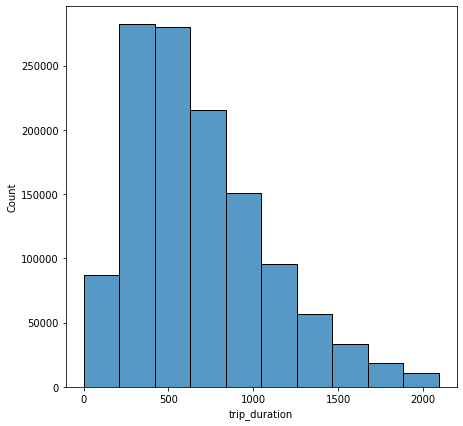

In [178]:
#visualizing target variable
plt.figure(figsize=(7,7))
sns.histplot(df['trip_duration'],bins=10)

<Axes: xlabel='trip_duration', ylabel='Count'>

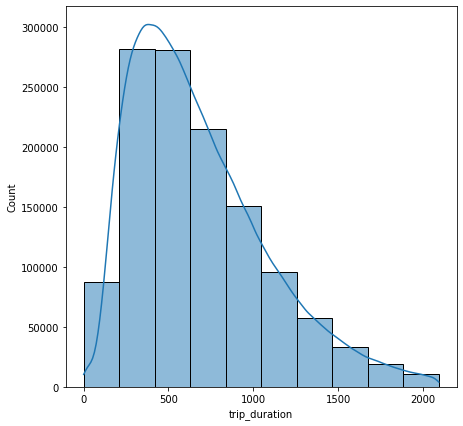

In [179]:
#visualizing target variable
plt.figure(figsize=(7,7))
sns.histplot(df['trip_duration'],kde=True,bins=10)

Answer Here

#### Chart - 2

<Axes: xlabel='pickup_hour', ylabel='Count'>

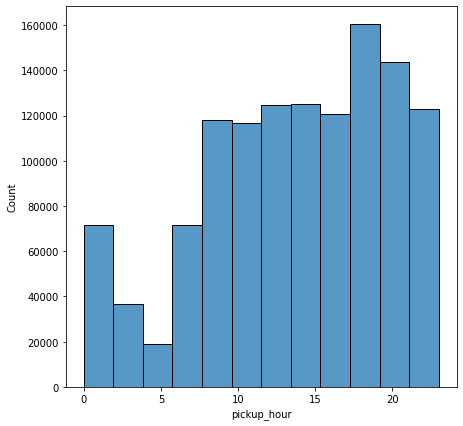

In [180]:
# Chart - 2 visualization code

plt.figure(figsize=(7,7))
sns.histplot(df['pickup_hour'],kde=False,bins=12)

Answer Here

#### Chart - 3

<Axes: xlabel='vendor_id', ylabel='count'>

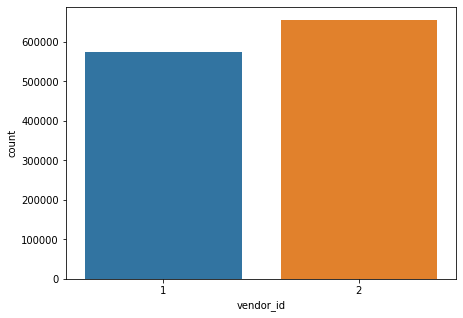

In [181]:
# Chart - 3 visualization code
fig = plt.figure(figsize = (7, 5))
 
# creating the count plot
sns.countplot(x=df.vendor_id)

Answer Here

#### Chart - 4

<Axes: xlabel='passenger_count', ylabel='count'>

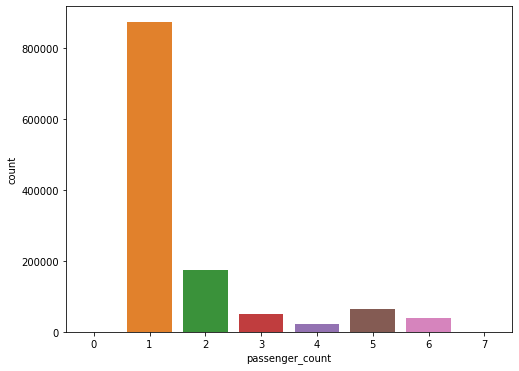

In [182]:
# Chart - 4 visualization code
fig = plt.figure(figsize = (8, 6))
sns.countplot(x=df.passenger_count)

Answer Here

#### Chart - 5

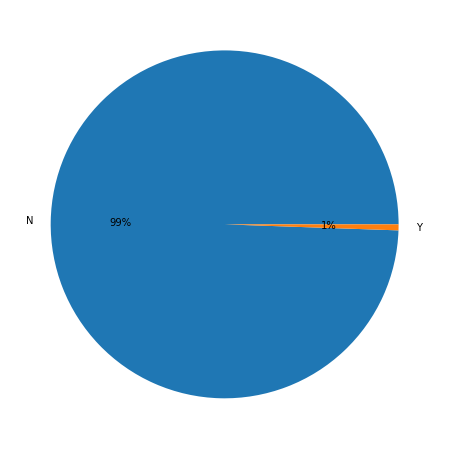

In [183]:
# Chart - 5 visualization code
fig = plt.figure(figsize = (8,8))

# plotting data on chart
plt.pie(x=flag_var_df['id'], labels=flag_var_df.index , autopct='%.0f%%')
  
# displaying chart
plt.show()

Answer Here

#### Chart - 6

<Axes: xlabel='weekday_name', ylabel='count'>

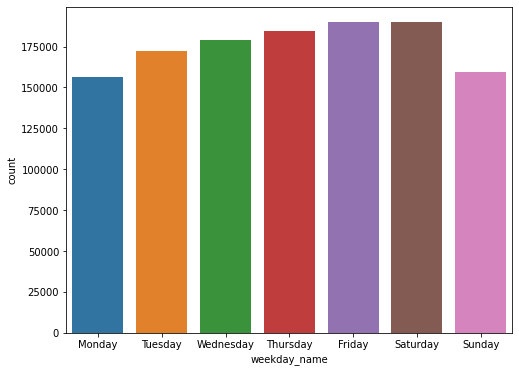

In [184]:
# Chart - 6 visualization code
fig = plt.figure(figsize = (8, 6))
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x=df.weekday_name, order=order)

Answer Here

#### Chart - 7

<Axes: xlabel='month', ylabel='count'>

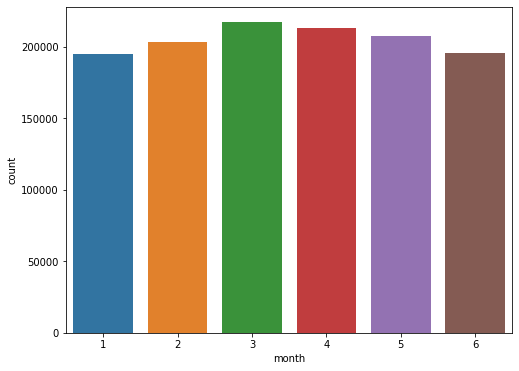

In [185]:
# Chart - 7 visualization code
fig = plt.figure(figsize = (8, 6))
sns.countplot(x=df.month)

Answer Here

#### Chart - 8

<Axes: xlabel='distance_in_km', ylabel='Count'>

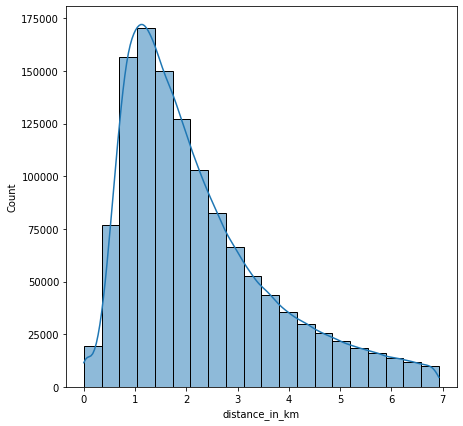

In [186]:
# Chart - 8 visualization code
plt.figure(figsize=(7,7))
sns.histplot(df.distance_in_km,kde=True,bins=20)

Answer Here

#### Chart - 9

<Axes: xlabel='avg_speed_kmph', ylabel='Count'>

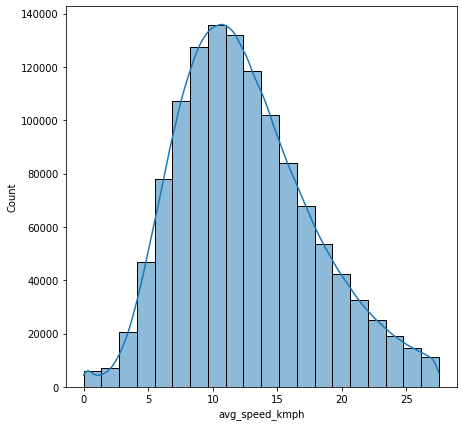

In [187]:
# Chart - 9 visualization code
plt.figure(figsize=(7,7))
sns.histplot(df.avg_speed_kmph,kde=True,bins=20)

Answer Here

### **Bivariate Analysis**

#### **Mean Trip Duration vs Hour**

<Axes: xlabel='pickup_hour', ylabel='trip_duration'>

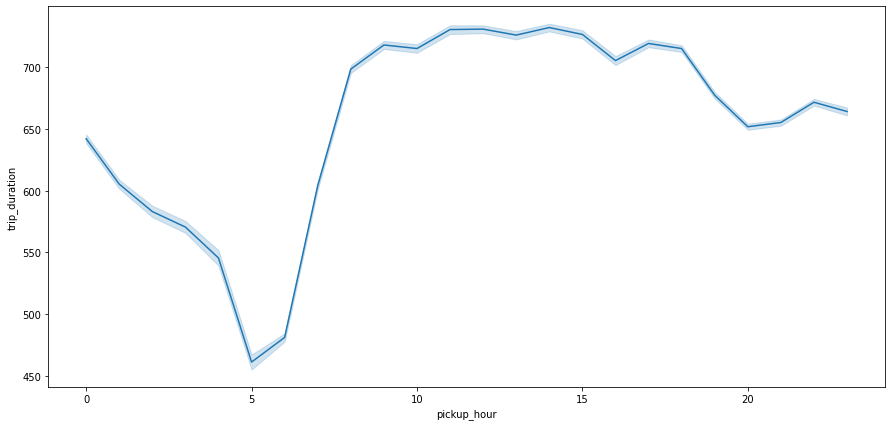

In [188]:
from numpy.core.fromnumeric import mean
# Chart - 10 visualization code
plt.figure(figsize=(15,7))
sns.lineplot(x=df['pickup_hour'], y=df['trip_duration'])
 

Answer Here.

#### **Trip Duration vs Day of Week**

<Axes: xlabel='weekday_name', ylabel='trip_duration'>

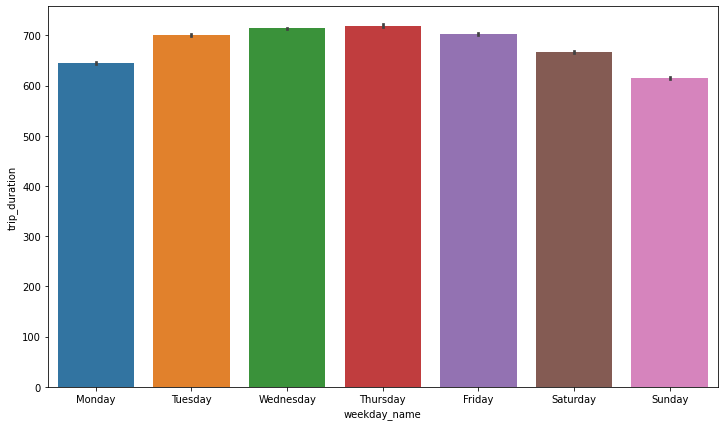

In [189]:
# Chart - 11 visualization code
plt.figure(figsize=(12,7))
sns.barplot(x=df['weekday_name'], y=df['trip_duration'], order=order )

Answer Here

#### **Trip Duration vs Month**

<Axes: xlabel='month', ylabel='trip_duration'>

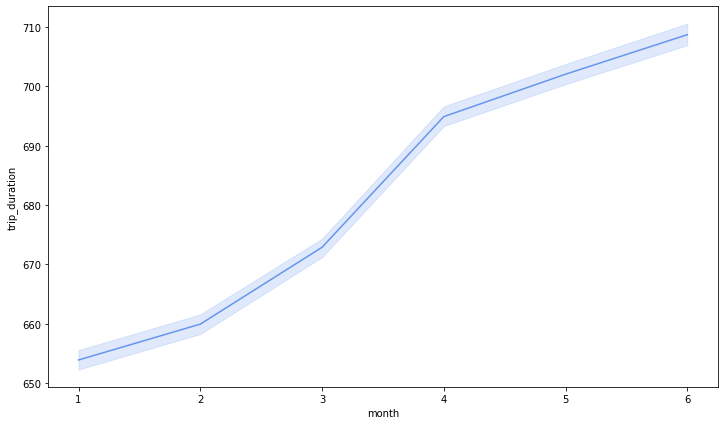

In [190]:
# Chart - 12 visualization code
plt.figure(figsize=(12,7))
sns.lineplot(x=df['month'], y=df['trip_duration'], color='cornflowerblue' )

Answer Here

#### **Trip Duration vs Vendor**

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

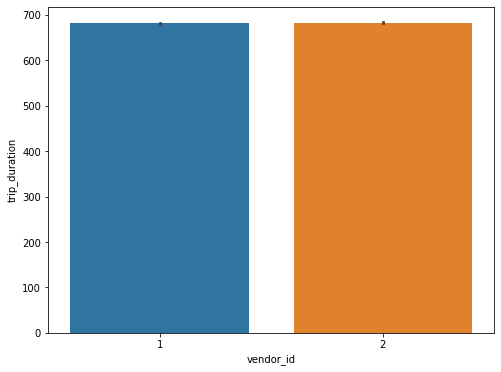

In [191]:
# Chart - 13 visualization code
plt.figure(figsize=(8,6))
sns.barplot(x=df['vendor_id'], y=df['trip_duration'] )

Answer Here

#### **Trip Duration vs Passenger Count**

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

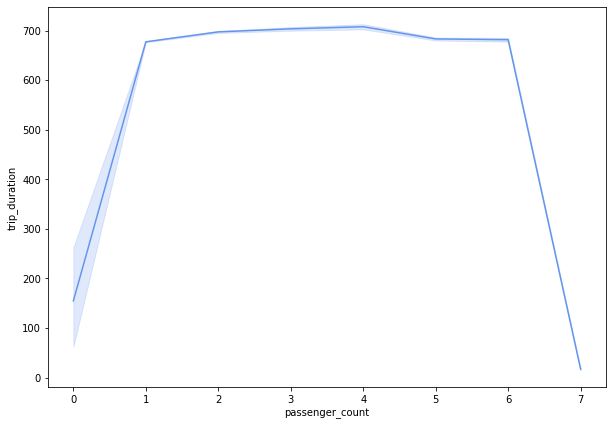

In [192]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['passenger_count'], y=df['trip_duration'], color='cornflowerblue' )

#### **Trip Duration vs Store and forward flag**

<Axes: xlabel='store_and_fwd_flag', ylabel='trip_duration'>

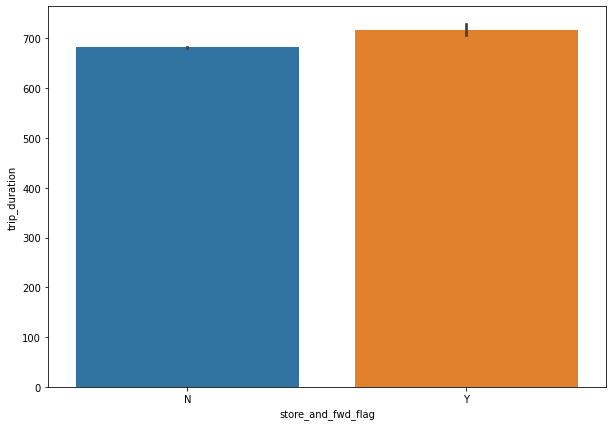

In [193]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='store_and_fwd_flag', y='trip_duration' )

#### **Distance vs Hour**

<Axes: xlabel='pickup_hour', ylabel='distance_in_km'>

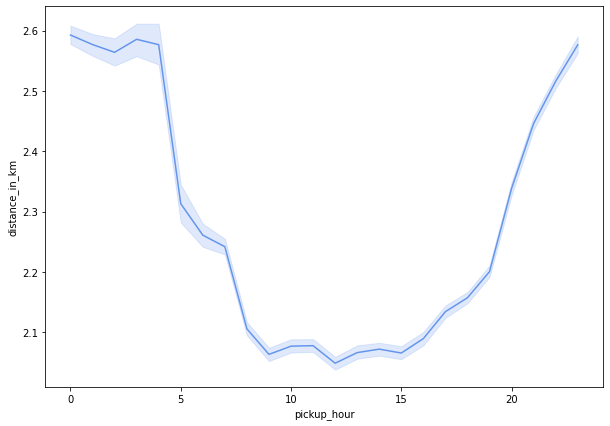

In [194]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['pickup_hour'], y=df['distance_in_km'], color='cornflowerblue' )

#### **Distance vs Weekday**

<Axes: xlabel='weekday_name', ylabel='distance_in_km'>

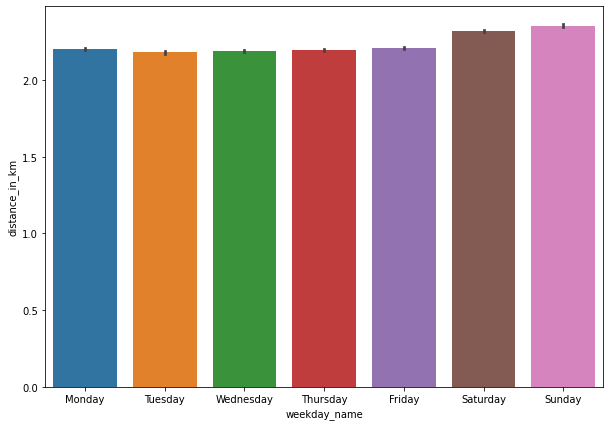

In [195]:
plt.figure(figsize=(10,7))

sns.barplot(x=df['weekday_name'], y=df['distance_in_km'], order=order )

#### **Distance vs Month**

<Axes: xlabel='month', ylabel='distance_in_km'>

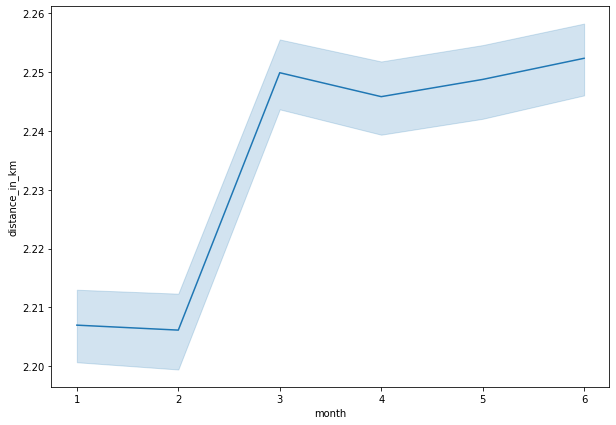

In [196]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['month'], y=df['distance_in_km'] )

#### **Distance vs Vendor**

<Axes: xlabel='vendor_id', ylabel='distance_in_km'>

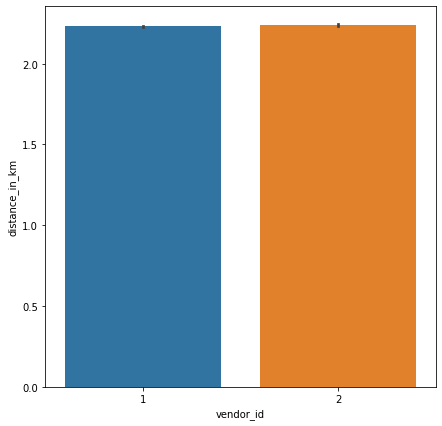

In [197]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['vendor_id'], y=df['distance_in_km'] )

#### **Distance vs Trip Duration**

<Axes: xlabel='trip_duration', ylabel='distance_in_km'>

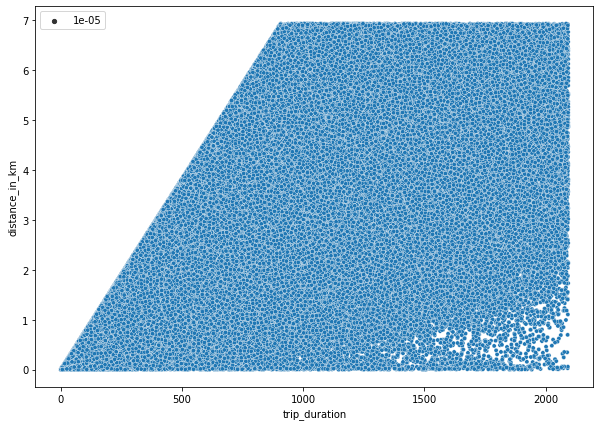

In [198]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['trip_duration'], y=df['distance_in_km'], size=0.00001)

#### **Avg Speed vs Hour**

<Axes: xlabel='pickup_hour', ylabel='avg_speed_kmph'>

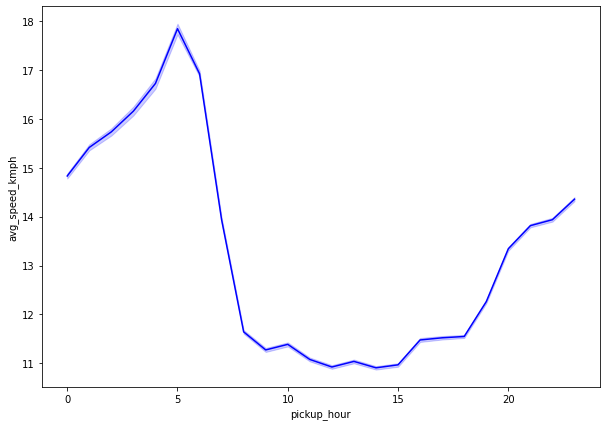

In [199]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['pickup_hour'], y=df['avg_speed_kmph'], color='blue' )

#### **Avg Speed vs Weekday**

<Axes: xlabel='weekday_name', ylabel='avg_speed_kmph'>

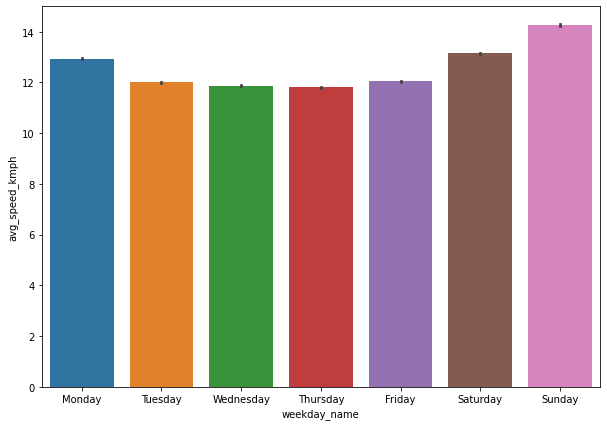

In [200]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['weekday_name'], y=df['avg_speed_kmph'], order=order )

#### **Passenger Count per Vendor**

<Axes: xlabel='vendor_id', ylabel='passenger_count'>

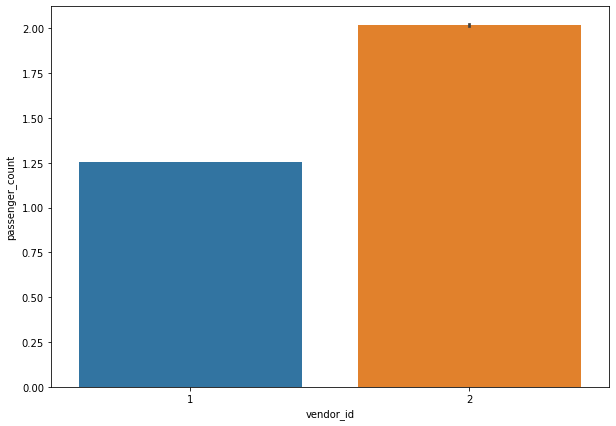

In [201]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['vendor_id'], y=df['passenger_count'] )

### **Multivariate Analysis**

#### **Avg Speed vs Hour for each Weekday**

<Axes: xlabel='pickup_hour', ylabel='avg_speed_kmph'>

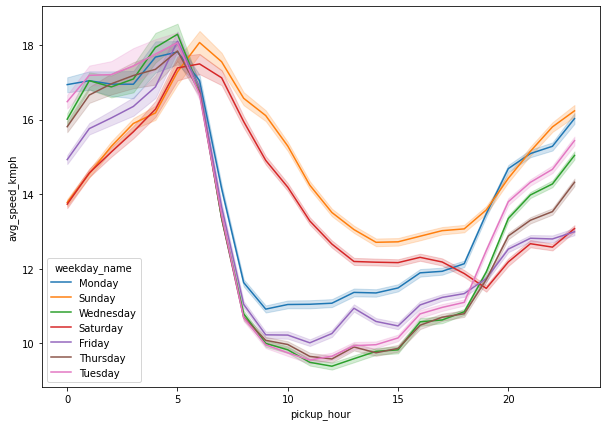

In [202]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='pickup_hour', y='avg_speed_kmph', hue='weekday_name' )

#### **Distance vs Trip Duration**

<Axes: xlabel='weekday_name', ylabel='trip_duration'>

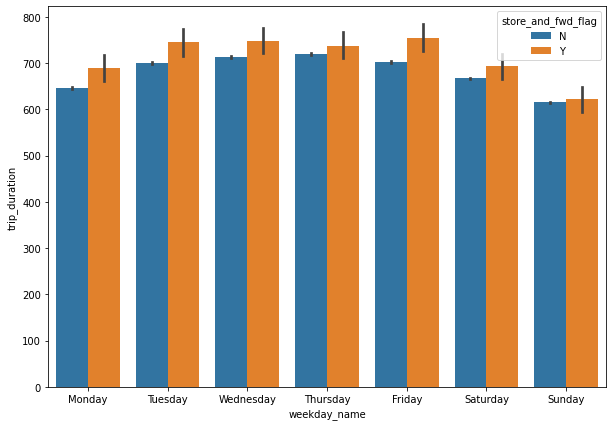

In [203]:
plt.figure(figsize=(10,7))
sns.barplot(data= df, x='weekday_name', y='trip_duration', hue='store_and_fwd_flag', order=order)

#### Chart - 14 - Correlation Heatmap

<Axes: >

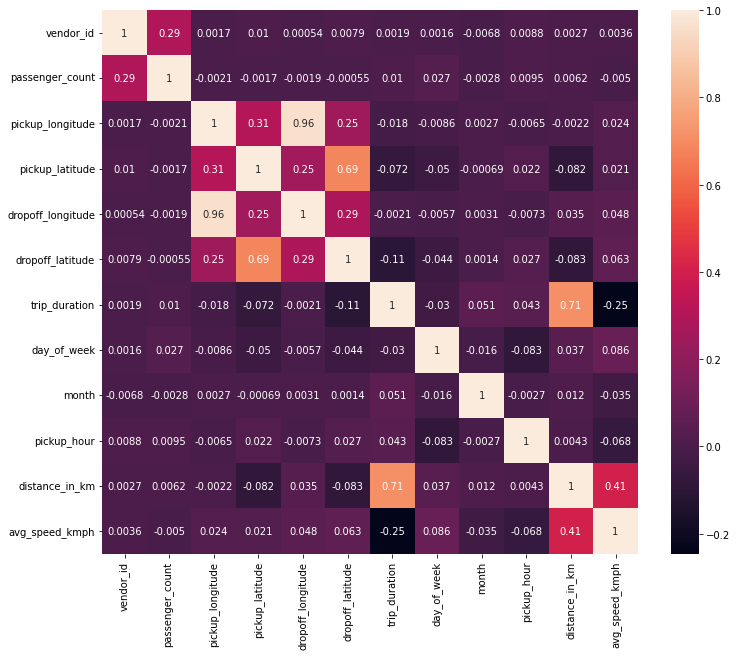

In [204]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [205]:
df.shape

(1231323, 17)

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1
###**Mean passenger_count for vendor_id 2 is equal to vendor_id 1.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
#### **H0 --> mean passenger_count of vendor_id 2 = mean passenger_count of vendor_id 1**
#### **H1 --> mean passenger_count of vendor_id 2 ≠ mean passenger_count of vendor_id 2**

Answer Here.

#### 2. Perform an appropriate statistical test.

In [206]:
#Let's make separate dataframes for both vendor_id
vendor_1 = df[df['vendor_id']==1]
vendor_2 = df[df['vendor_id']==2]

In [207]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# Perform a two-sample t-test
t, p = stats.ttest_ind(vendor_1['passenger_count'], vendor_2['passenger_count'], equal_var=False)

# Print the results
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -353.4729872177838
p-value: 0.0


<Axes: xlabel='vendor_id', ylabel='Count'>

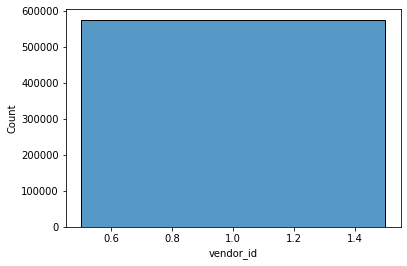

In [208]:
sns.histplot(data=vendor_1, x='vendor_id')

<Axes: xlabel='vendor_id', ylabel='Count'>

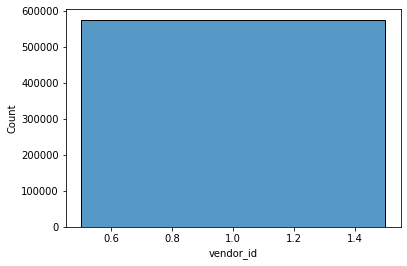

In [209]:
sns.histplot(data=vendor_1, x='vendor_id')

##### Which statistical test have you done to obtain P-Value?

The ttest_ind() function from the scipy.stats module performs the two-sample t-test with the equal_var=False parameter, since we don't assume that the variances of the two datasets are equal. The resulting t value and p value tell us whether the difference in average trip time between the two datasets is statistically significant.

##### Why did you choose the specific statistical test?

Answer Here.

### **Hypothesis 2**: The average trip time for trips during the weekend (Saturday and Sunday) is significantly different from the average trip time for trips during the weekdays (Monday to Friday).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypthesis:** The average trip time for trips during the weekend is equal to the average trip time for trips during weekdays.

**Alternate Hypothesis**: The average trip time for trips during the weekend is different from the average trip time for trips during weekdays.

#### 2. Perform an appropriate statistical test.

In [210]:
#let's load the necessary libraries
from scipy import stats

In [211]:
# Perform Statistical Test to obtain P-Value

# Create separate datasets for trips during the weekend and weekdays
weekend_trips = df[(df['day_of_week'] == 5) | (df['day_of_week'] == 6)]
weekday_trips = df[(df['day_of_week'] >= 0) & (df['day_of_week'] <= 4)]


In [212]:
# Perform a two-sample t-test
t, p = stats.ttest_ind(weekend_trips['trip_duration'], weekday_trips['trip_duration'], equal_var=False)

# Print the results
print('t-statistic:', t)
print('p-value:', p)


t-statistic: -71.38524743354759
p-value: 0.0


In [213]:
# Perform a two-sample z-test
from statsmodels.stats.weightstats import ztest

t,p = ztest(np.sqrt(weekend_trips['trip_duration']), np.sqrt(weekday_trips['trip_duration']))

# Print the results
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -64.72613961202717
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

The ttest_ind() function from the scipy.stats module performs the two-sample t-test with the equal_var=False parameter, since we don't assume that the variances of the two datasets are equal. The resulting t value and p value tell us whether the difference in average trip time between the two datasets is statistically significant.

##### Why did you choose the specific statistical test?

<Axes: xlabel='trip_duration', ylabel='Count'>

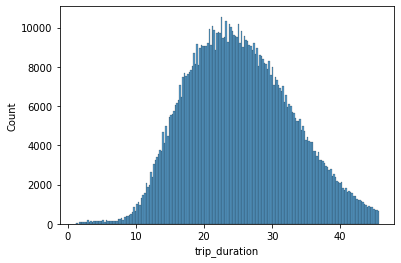

In [214]:
sns.histplot(data=weekday_trips, x=np.sqrt(weekday_trips['trip_duration']))

In [215]:
np.sqrt(weekday_trips['trip_duration']).mean()

25.27937345823425

In [216]:
np.sqrt(weekday_trips.trip_duration).median()

24.79919353527449

Answer Here.

### **Hypothetical Statement - 3**
The distribution of trip distances for NYC taxi rides is different on weekdays vs weekends.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The distribution of trip distances is same on weekdays vs weekends.

**Alternate Hypothesis:** The distribution of trip distances is different on weekdays vs weekends.

#### 2. Perform an appropriate statistical test.

In [217]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

In [218]:
# Create a new column that indicates whether each trip occurred on a weekday or weekend
df['weekend'] = np.where(df['day_of_week'] < 5, False, True)

In [219]:
# Create a contingency table of trip distances for weekdays and weekends
cont_table = pd.crosstab(df['distance_in_km'], df['weekend'])

# Print the contingency table
print(cont_table)


weekend         False  True
distance_in_km             
0.00                0     1
0.00                0     1
0.00                1     0
0.00                0     1
0.00                1     0
...               ...   ...
6.93                1     0
6.93                1     0
6.93                1     0
6.93                0     1
6.93                0     1

[1231314 rows x 2 columns]


In [220]:
# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(cont_table)

# Print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)


Chi-square statistic: 1231320.5386096078
p-value: 0.49791406277566896


##### Which statistical test have you done to obtain P-Value?

The chi2_contingency() function from the scipy.stats module performs the chi-square test of independence on the contingency table. The resulting chi2 value and p value tell us whether the observed frequencies of trip distances on weekdays and weekends are significantly different from the expected frequencies, assuming that the distribution of trip distances is the same on weekdays and weekends.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

In [221]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,month,pickup_hour,weekday_name,distance_in_km,avg_speed_kmph,weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,0,3,17,Monday,1.50,11.89,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,6,6,0,Sunday,1.81,9.82,True
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,2,4,19,Wednesday,1.48,12.45,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,5,3,13,Saturday,1.19,9.82,True
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.98,40.74,-73.99,40.75,N,443,5,1,22,Saturday,1.10,8.94,True


### **Feature Selection**

In [222]:
#dropping geolocation columns due to high multicollinearity and less relevance 
df.drop(columns=['dropoff_longitude','dropoff_latitude','pickup_longitude','pickup_latitude'], inplace=True)

#dropping datetime columns as they are included in hour, week and month columns
df.drop(columns=['pickup_datetime','dropoff_datetime'])

#dropping avg_speed to avoid data leakage because it was calculated using target variable
df.drop(columns=['avg_speed_kmph'], inplace=True)

#dropping some more unnecessary columns
df.drop(columns=['weekday_name','store_and_fwd_flag'], inplace=True)

<Axes: >

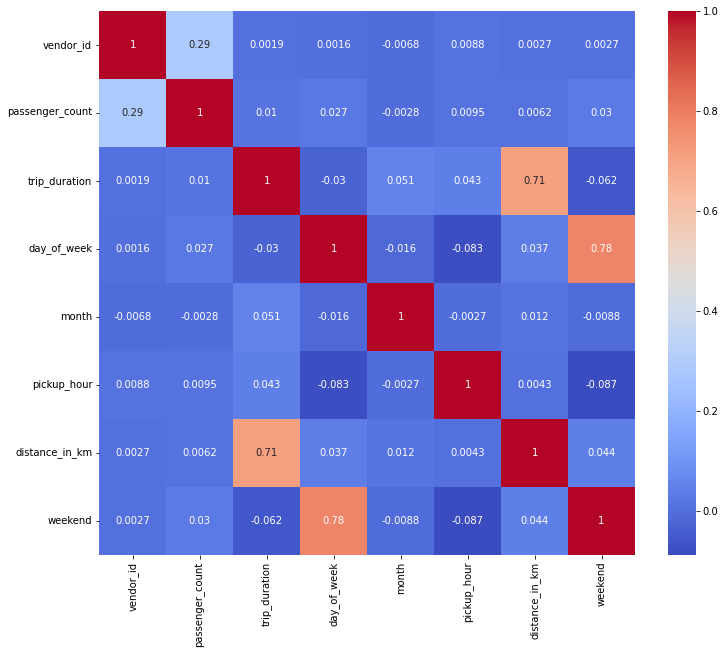

In [223]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [224]:
#removing weekend column due to collinearity
df.drop(columns=['weekend'], inplace=True)

<Axes: >

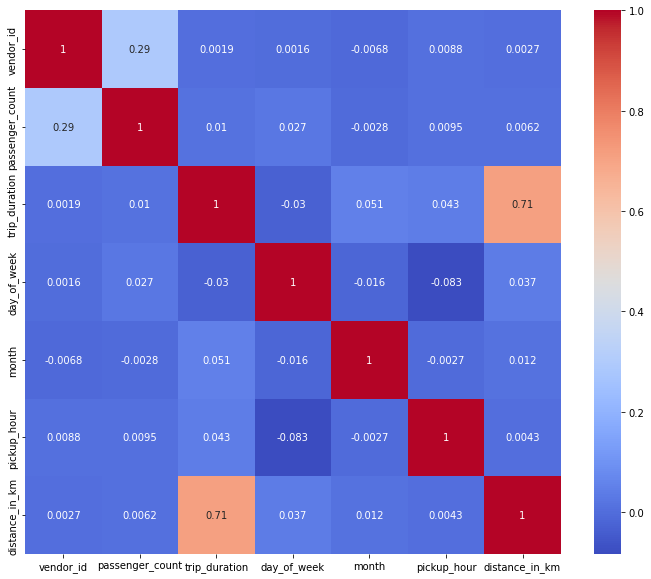

In [225]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [226]:
numeric_features = df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'trip_duration', 'day_of_week', 'month',
       'pickup_hour', 'distance_in_km'],
      dtype='object')

In [227]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [228]:
calc_vif(df[[i for i in df.describe().columns if i not in ['trip_duration']]])

,variables,VIF
0,vendor_id,7.73
1,passenger_count,2.83
2,day_of_week,3.07
3,month,4.39
4,pickup_hour,4.63
5,distance_in_km,3.10


### **Data Transformation**

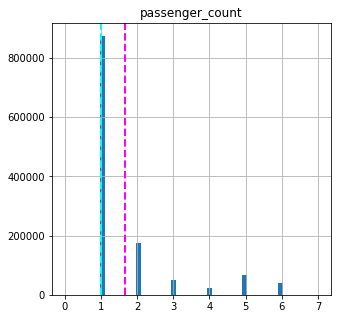

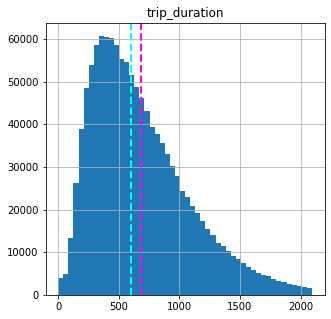

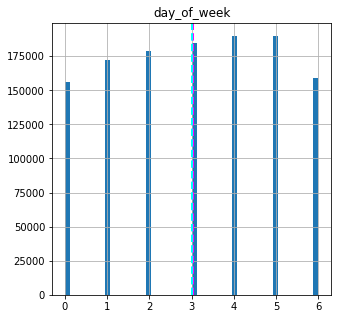

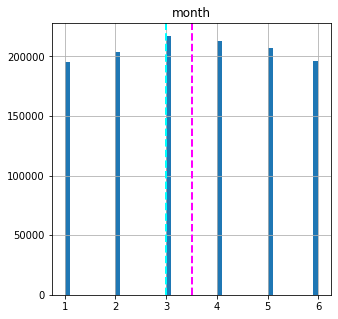

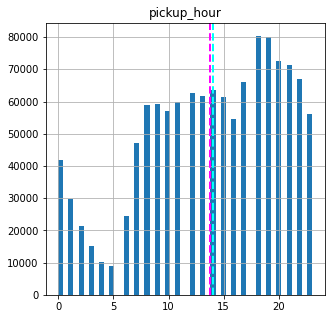

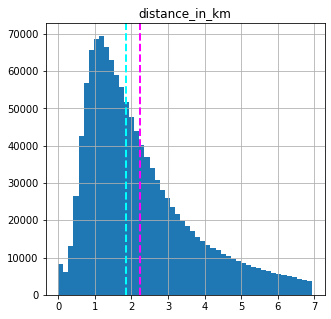

In [229]:

# plot a bar plot for each numerical feature count 

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [230]:
#tranforming columns to shrink tails in normal distribution
df['distance_in_km'] = np.sqrt(df.distance_in_km)

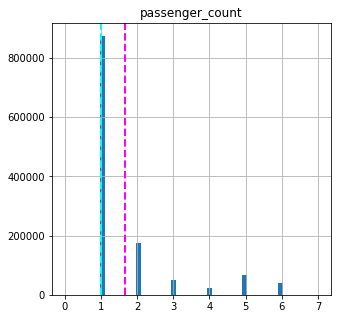

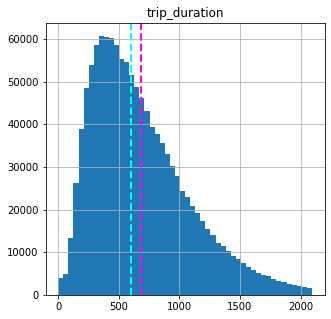

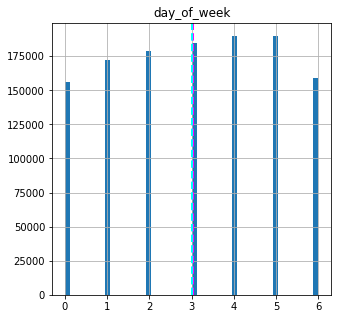

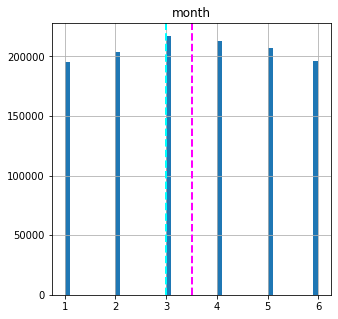

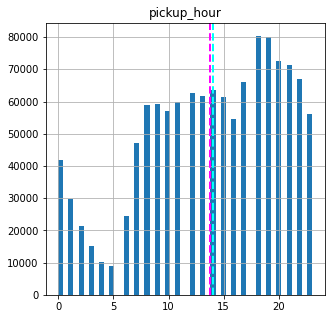

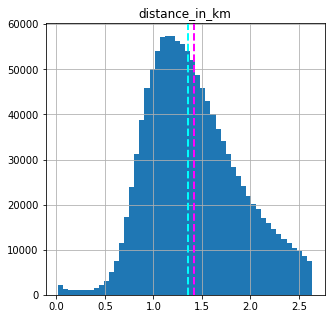

In [231]:

# plot a bar plot for each numerical feature count 

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [232]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_duration', 'day_of_week', 'month',
       'pickup_hour', 'distance_in_km'],
      dtype='object')

###**Data Scaling**

In [233]:
independent_variables = ['vendor_id', 'passenger_count', 'day_of_week', 'month', 'pickup_hour', 'distance_in_km']
dependent_variable = 'trip_duration'

In [234]:
# Create the data of independent variables
X = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values

In [235]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [236]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [237]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [238]:
regressor.intercept_

-187.3098612608445

In [239]:
regressor.coef_

array([  -2.86468713,   16.09286677,  -64.63435139,   49.39253194,
         46.80666003, 1582.05903189])

In [240]:
y_pred_train = regressor.predict(X_train)

In [241]:
y_train


array([ 681,  372,   59, ..., 1555,  333,  959])

In [242]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [243]:
#Predicted trip_duration on the test data
y_pred

array([842.94738799, 898.25739266, 849.22097407, ..., 544.52186576,
       252.68808408, 279.624829  ])

In [244]:
# Actual trip_duration on test data
y_test

array([1015,  944,  721, ...,  569,   84,  292])

In [245]:
mean_squared_error(y_test, y_pred)

76512.4140698719

In [246]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

275.9705801223935

In [247]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

276.6087743906037

In [248]:
r2_score(y_train, y_pred_train)

0.5184477904881816

In [249]:
r2_score(y_test, y_pred)

0.51807917326391

### 1. Handling Missing Values

There were no missing values in the given dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [250]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [251]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [252]:
# Expand Contraction

#### 2. Lower Casing

In [253]:
# Lower Casing

#### 3. Removing Punctuations

In [254]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [255]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [256]:
# Remove Stopwords

In [257]:
# Remove White spaces

#### 6. Rephrase Text

In [258]:
# Rephrase Text

#### 7. Tokenization

In [259]:
# Tokenization

#### 8. Text Normalization

In [260]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [261]:
# POS Taging

#### 10. Text Vectorization

In [262]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [263]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [264]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [265]:
# Transform Your data

### 6. Data Scaling

In [266]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [267]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [268]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [269]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [270]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [271]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [272]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [273]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [274]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [275]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [276]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [277]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [278]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [279]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***